In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [3]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Is the work_contract_type important in the salary?

- Plot an scatterplot comparing the salary_monthly_NET and the salary_monthly_GROSS painting with two different colors points that have a Full-time contract and those with a Part-Time contract.

- Plot two boxplots comparing the salary_monthly_NET of Full-time and Part-time devs

Can we say that people having ages between 18 to 30 only work on th3 dev field?

- Take the column profile_age and create intervals of length 10 between 18 and 58. Then create a barplot where the x axis correspond to these intervals and y axis the frequency. Add a hue comparing Full-time and Part-time positions.

- Replicate your plots using plotly.


## Solutions

- Plot an scatterplot comparing the salary_monthly_NET and the salary_monthly_GROSS painting with two different colors points that have a Full-time contract and those with a Part-Time contract.

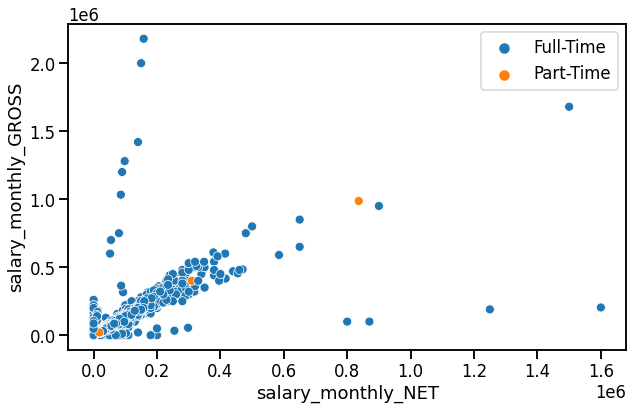

In [10]:
df_fp = df[df["work_contract_type"].isin(["Full-Time", "Part-Time"])]

plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df_fp, x="salary_monthly_NET", y="salary_monthly_GROSS", hue="work_contract_type")
plt.legend(loc="upper right")

- Plot two boxplots comparing the salary_monthly_NET of Full-time and Part-time devs

<AxesSubplot:xlabel='salary_monthly_NET', ylabel='work_contract_type'>

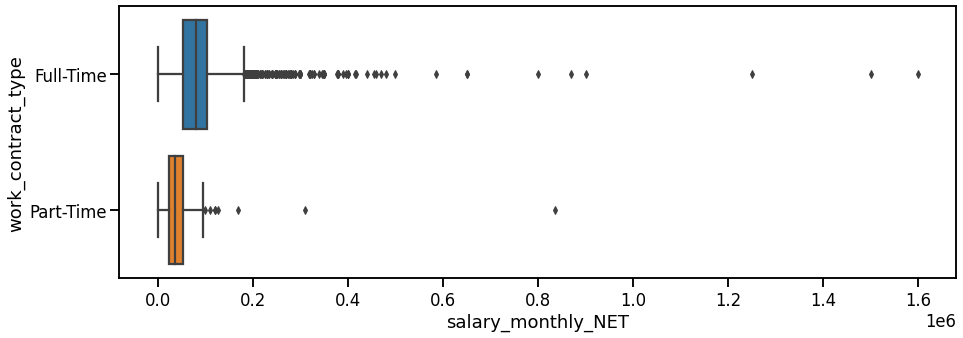

In [18]:
plt.figure(figsize=(15,5))
seaborn.boxplot(data=df_fp, x="salary_monthly_NET", y="work_contract_type")

- Take the column profile_age and create intervals of length 10 between 18 and 58. Then create a barplot where the x axis correspond to these intervals and y axis the frequency. Add a hue comparing Full-time and Part-time positions.

In [19]:
import numpy

def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [21]:
df_fp['profile_age_segment'] = to_categorical(df.profile_age)

/tmp/ipykernel_263389/152357489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fp['profile_age_segment'] = to_categorical(df.profile_age)


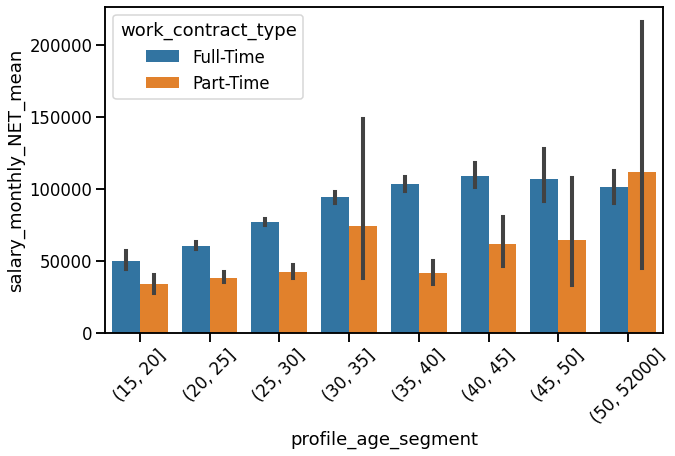

In [35]:
fig = plt.figure(figsize=(10,6))
seaborn.barplot(data=df_fp, x='profile_age_segment', y="salary_monthly_NET", hue="work_contract_type")

plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("profile_age_segment")
plt.ticklabel_format(style='plain', axis='y')

- Replicate your plots using plotly.

In [28]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"


In [30]:
fig = px.scatter(df_fp, y="salary_monthly_GROSS", x="salary_monthly_NET", color="work_contract_type")
fig.show()

In [32]:
fig = px.box(df_fp, y="work_contract_type", x="salary_monthly_NET")
fig.show()

In [36]:
df_age_segment_mean = (
    df_fp[["profile_age_segment", "salary_monthly_NET"]]
      .groupby("profile_age_segment")
      .agg(salary_monthly_NET_mean=("salary_monthly_NET", "mean"),
           salary_monthly_NET_std=("salary_monthly_NET", "std"))
      .reset_index()
)
df_age_segment_mean

,profile_age_segment,salary_monthly_NET_mean,salary_monthly_NET_std
0,"(15, 20]",43579.354000,20486.680488
1,"(20, 25]",57284.541591,33046.591870
2,"(25, 30]",74691.424766,42217.277053
3,"(30, 35]",93531.137691,73690.924942
4,"(35, 40]",101556.312341,70221.303641
5,"(40, 45]",107791.238751,87739.437594
6,"(45, 50]",104996.945599,111431.465422
7,"(50, 52000]",101439.350000,67914.378039


In [40]:
df_age_segment_mean["profile_age_segment_str"] = df_age_segment_mean["profile_age_segment"].astype(str)
fig = px.bar(df_age_segment_mean,
             x='profile_age_segment_str',
             y='salary_monthly_NET_mean',
             error_y="salary_monthly_NET_std")
fig.show()